In a different notebook because Pandas is not working in my GRASS environ

code in results_table, plot_hits_miss, plot_quant_alloc_error tables from Anna Petrasova scripts available https://colab.research.google.com/drive/1mTEJanqihKwHAAnjhQpfegURq1whnq-G#scrollTo=15pC4nfQldCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
with open("metrics_sub", "rb") as pf:
  metrics_sub = pickle.load(pf)
with open("metrics", "rb") as pf:
  metrics_core = pickle.load(pf)
with open("metrics_base", "rb") as pf:
  metrics_base = pickle.load(pf)

In [3]:
def results_table(metrics):
  tab = pd.DataFrame.from_records(metrics)
  tab["hits"] *= 100
  tab["misses"] *= 100
  tab["false_alarms"] *= 100
  tab["figure_of_merit"] *= 100
  tab["null_successes"] *= 100
  tab["initially_developed"] *= 100
  tab["quantity_error"] = tab["misses"] - tab["false_alarms"]
  tab["total_error"] = tab["misses"] + tab["false_alarms"]
  tab["allocation_error"] = tab["total_error"] - tab["quantity_error"]
  return(tab)

In [4]:
def plot_hits_miss(tab):
  width = 0.1       # the width of the bars: can also be len(x) sequence
  plt.style.use('seaborn-v0_8-notebook')
  # plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.GnBu)
  fig, ax = plt.subplots()
  cmap = plt.cm.get_cmap('viridis', 5)
  ax.set_prop_cycle(color=cmap.colors)
  fig.set_size_inches(1, 6)
  ax.bar([""], tab["misses"].mean(), width, label='Misses')
  ax.bar([""], tab["false_alarms"].mean(), width, bottom=tab["misses"].mean(),
        label='false alarms')
  ax.bar([""], tab["hits"].mean(), width, bottom=tab["misses"].mean() + tab["false_alarms"].mean(),
        label='Hits')
  ax.bar([""], tab["null_successes"].mean(), width, bottom=tab["misses"].mean() + tab["false_alarms"].mean() + tab["hits"].mean(),
        label='Null successes')
  ax.bar([""], tab["initially_developed"].mean(), width, bottom=tab["misses"].mean() + tab["false_alarms"].mean() + tab["hits"].mean() + tab["null_successes"].mean(),
        label='Initially_developed')
  ax.text(-0.03, -5, f'{tab["misses"].mean():.2f}%', color='black')
  ax.text(-0.03, 2.5, f'{tab["false_alarms"].mean():.2f}%', color='black')
  ax.text(0.06, 3, f'{tab["hits"].mean():.2f}%', color='black')
  ax.text(-0.03, 45, f'{tab["null_successes"].mean():.2f}%', color='black')
  ax.text(-0.03, 93, f'{tab["initially_developed"].mean():.2f}%', color='black')
  plt.ylabel('Percent of landscape')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  return(plt.show())

In [5]:
def plot_quant_alloc_error(tab):
  width = 0.1       # the width of the bars: can also be len(x) sequence

  fig, ax = plt.subplots()
  fig.set_size_inches(1, 6)
  cmap = plt.cm.get_cmap('viridis', 3)
  ax.set_prop_cycle(color=cmap.colors)
  ax.bar([""], tab["quantity_error"].mean(), width, label='Quantity error')
  ax.bar([""], tab["allocation_error"].mean(), width, bottom=tab["quantity_error"].mean(),
        label='Allocation error')
  ax.bar([""], tab["hits"].mean(), width, bottom=tab["total_error"].mean(),
        label='Hits')
  ax.text(-0.02, 0.5, f'{tab["quantity_error"].mean():.2f}%', color='black')
  ax.text(-0.02, 2.7, f'{tab["allocation_error"].mean():.2f}%', color='black')
  ax.text(-0.02, 6.4, f'{tab["hits"].mean():.2f}%', color='black')
  plt.ylabel('Percent of landscape')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  return(plt.show())

In [6]:
metrics_base_tab = results_table(metrics_base)
metrics_core_tab = results_table(metrics_core)
metrics_sub_tab = results_table(metrics_sub)

In [7]:
metrics_base_tab["figure_of_merit"].mean()

2.5802597593338987

In [9]:
metrics_sub_tab["figure_of_merit"].mean()

2.550810140432645

C:\Users\malawrim\AppData\Local\Temp\ipykernel_34488\1453092354.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 5)


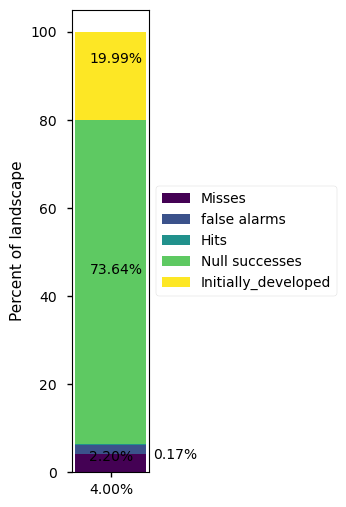

In [8]:
plot_hits_miss(metrics_base_tab)

C:\Users\malawrim\AppData\Local\Temp\ipykernel_34488\1453092354.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 5)


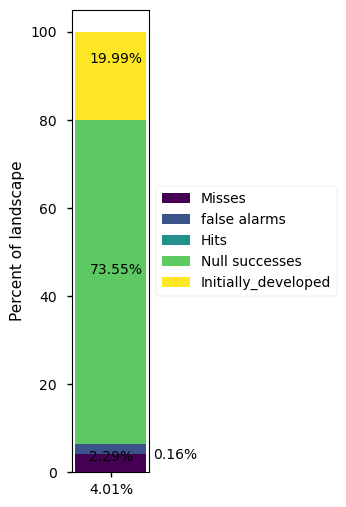

In [10]:
plot_hits_miss(results_table(metrics_core))

C:\Users\malawrim\AppData\Local\Temp\ipykernel_21540\1453092354.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 5)


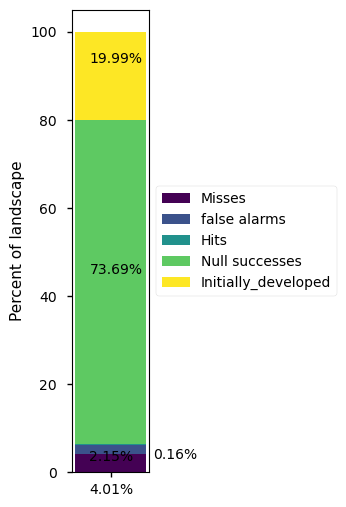

In [124]:
plot_hits_miss(results_table(metrics_sub))

C:\Users\malawrim\AppData\Local\Temp\ipykernel_21540\4128907165.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


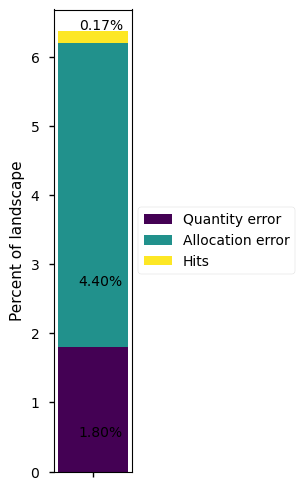

In [133]:
plot_quant_alloc_error(metrics_base_tab)

C:\Users\malawrim\AppData\Local\Temp\ipykernel_21540\4128907165.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


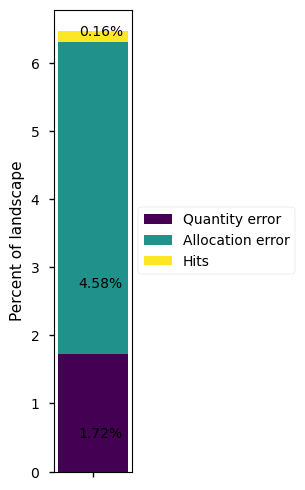

In [134]:
plot_quant_alloc_error(metrics_core_tab)

C:\Users\malawrim\AppData\Local\Temp\ipykernel_21540\4128907165.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


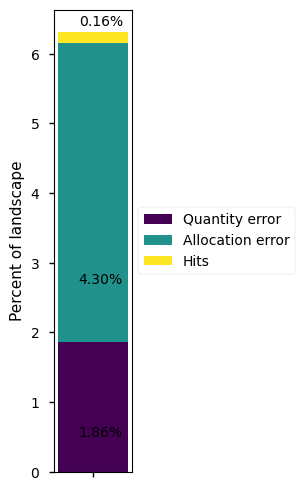

In [135]:
plot_quant_alloc_error(metrics_sub_tab)

Without pandas -- much more complicated

In [80]:
columns = np.array(list(metrics[0].keys()))
tab = np.array(list(metrics[1].values()))

In [82]:
for m in metrics:
  tab = np.vstack([tab, list(m.values())])
tab = tab[1:]

In [104]:
columns

array(['quantity_class_0', 'quantity_class_1', 'allocation_class_0',
       'allocation_class_1', 'total_quantity', 'total_allocation',
       'kappa', 'kappasimulation', 'misses', 'hits', 'false_alarms',
       'null_successes', 'figure_of_merit', 'producer', 'user',
       'initially_developed'], dtype='<U19')

In [98]:
mean_hit = np.multiply(tab[:, 9], np.full(len(tab[:, 9]), 100.0)).mean()

In [109]:
mean_misses = np.multiply(tab[:, 8], np.full(len(tab[:, 8]), 100.0)).mean()
mean_false_alarms = np.multiply(tab[:, 10], np.full(len(tab[:, 10]), 100.0)).mean()
mean_figure_of_merit = np.multiply(tab[:, 12], np.full(len(tab[:, 12]), 100.0)).mean()
mean_null_successes = np.multiply(tab[:, 11], np.full(len(tab[:, 11]), 100.0)).mean()
mean_initially_developed = np.multiply(tab[:, 15], np.full(len(tab[:, 15]), 100.0)).mean()
quantity_error = np.subtract(np.multiply(tab[:, 8], np.full(len(tab[:, 8]), 100.0)), np.multiply(tab[:, 10], np.full(len(tab[:, 10]), 100.0)))
mean_quantity_error = quantity_error.mean()
total_error = np.add(np.multiply(tab[:, 8], np.full(len(tab[:, 8]), 100.0)), np.multiply(tab[:, 10], np.full(len(tab[:, 10]), 100.0)))
mean_total_error = total_error.mean()
allocation_error = np.subtract(total_error, quantity_error)
mean_allocation_error = allocation_error.mean()